<a href="https://colab.research.google.com/github/tpraissa/Alura_DataScience_aula01/blob/master/introducao_aula01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd

notas = pd.read_csv("ratings.csv")


notas.columns = ["usuarioId", "filmesId", "nota", "tempoId"]
notas.head()

notas['nota'].value_counts()


4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: nota, dtype: int64

In [4]:
filmes = pd.read_csv("movies.csv")

filmes.columns = ["filmesId", "titulos", "generos"]
filmes.head()

,filmesId,titulos,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
notas.query("filmesId==1").nota.mean()

3.9209302325581397

In [6]:
medias_por_filme = notas.groupby("filmesId").mean().nota
medias_por_filme.head()

filmesId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: nota, dtype: float64

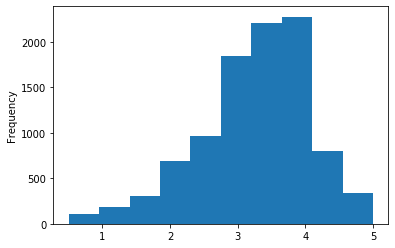

In [7]:
medias_por_filme.plot(kind = "hist")

In [8]:
medias_por_filme.describe()

count    9724.000000
mean        3.262448
std         0.869874
min         0.500000
25%         2.800000
50%         3.416667
75%         3.911765
max         5.000000
Name: nota, dtype: float64

(array([ 108.,  185.,  309.,  694.,  962., 1840., 2211., 2275.,  798.,
         342.]),
 array([0.5 , 0.95, 1.4 , 1.85, 2.3 , 2.75, 3.2 , 3.65, 4.1 , 4.55, 5.  ]),
 <a list of 10 Patch objects>)

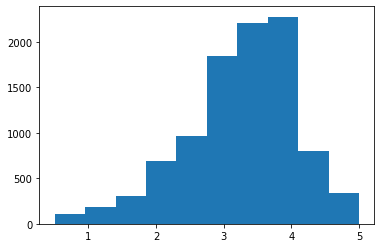

In [9]:
import matplotlib.pyplot as plt
plt.hist(medias_por_filme)

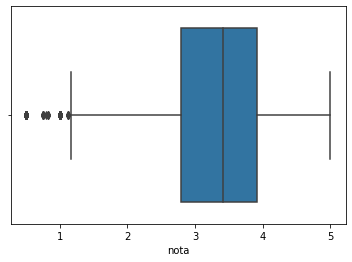

In [10]:
import seaborn as sns
sns.boxplot(medias_por_filme)

In [12]:
tdmb = pd.read_csv("tmdb_5000_movies.csv")
tdmb.original_language.unique()



array(['en', 'ja', 'fr', 'zh', 'es', 'de', 'hi', 'ru', 'ko', 'te', 'cn',
       'it', 'nl', 'ta', 'sv', 'th', 'da', 'xx', 'hu', 'cs', 'pt', 'is',
       'tr', 'nb', 'af', 'pl', 'he', 'ar', 'vi', 'ky', 'id', 'ro', 'fa',
       'no', 'sl', 'ps', 'el'], dtype=object)

In [15]:
#quantidade de categorias --> Abordagem indireta
#tdmb["original_language"].value_counts()
#tdmb["original_language"].value_counts().index
contagem_de_lingua = tdmb["original_language"].value_counts().to_frame().reset_index() #resetar o index e transformar um index novo em coluna
contagem_de_lingua.columns = ["original_language", "total"]
contagem_de_lingua.head()

,original_language,total
0,en,4505
1,fr,70
2,es,32
3,de,27
4,zh,27


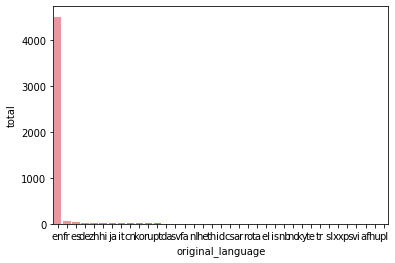

In [16]:
sns.barplot( x = "original_language", y = "total", data = contagem_de_lingua)

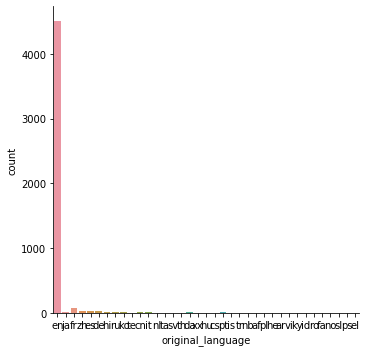

In [17]:
#quantidade de categoria ---> Abordagem Direta(alto nivel)
sns.catplot(x = "original_language", kind = "count", data = tdmb)

([<matplotlib.patches.Wedge at 0x7f0db1d01940>,
 [Text(-1.0791697536499925, 0.2130554923183512, 'en'),
  Text(1.0355355017029462, -0.3710339940124459, 'fr'),
  Text(1.0579676486019882, -0.3011718023181785, 'es'),
  Text(1.0687996606645356, -0.26012936274741094, 'de'),
  Text(1.0773191105706255, -0.22222406260195313, 'zh'),
  Text(1.0835167978583342, -0.18971386021801853, 'hi'),
  Text(1.0875756432724297, -0.16486121484618815, 'ja'),
  Text(1.0906010773146022, -0.14348968659882622, 'it'),
  Text(1.092883487371409, -0.12492270822755745, 'cn'),
  Text(1.0946390911069936, -0.10846778425161549, 'ko'),
  Text(1.0960865535188649, -0.09270527058984593, 'ru'),
  Text(1.0972054830031333, -0.07835896928789601, 'pt'),
  Text(1.097965443340663, -0.06687215586282344, 'da'),
  Text(1.0984565010300316, -0.05825217030171998, 'sv'),
  Text(1.0987803851616647, -0.0517847968421653, 'fa'),
  Text(1.0990363161210686, -0.04603450713357274, 'nl'),
  Text(1.0992355702663055, -0.04100196411527794, 'he'),
  Text

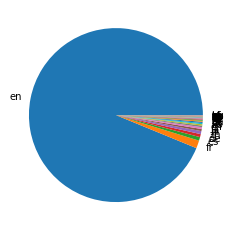

In [19]:
plt.pie(contagem_de_lingua["total"],labels= contagem_de_lingua["original_language"])

In [21]:
total_por_lingua = tdmb["original_language"].value_counts()
total_geral = total_por_lingua.sum()
total_de_ingles = total_por_lingua.loc["en"]
total_do_resto = total_geral - total_de_ingles
print(total_de_ingles, total_do_resto)

4505 298


In [23]:
dados = {
    'lingua' : ['ingles','outros'],
    'total' : [total_de_ingles, total_do_resto]
}
dados = pd.DataFrame(dados)
dados

,lingua,total
0,ingles,4505
1,outros,298


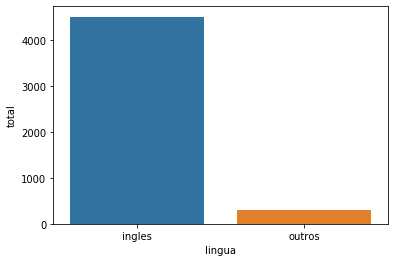

In [24]:
sns.barplot(x = "lingua", y = "total", data = dados)

([<matplotlib.patches.Wedge at 0x7f0db16ba278>,
 [Text(-1.0791697536499925, 0.2130554923183512, 'ingles'),
  Text(1.0791697511565306, -0.2130555049482467, 'outros')])

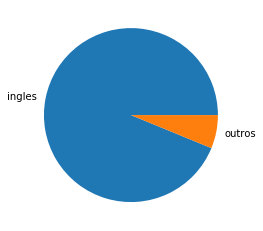

In [26]:
plt.pie(dados["total"],labels= dados["lingua"])

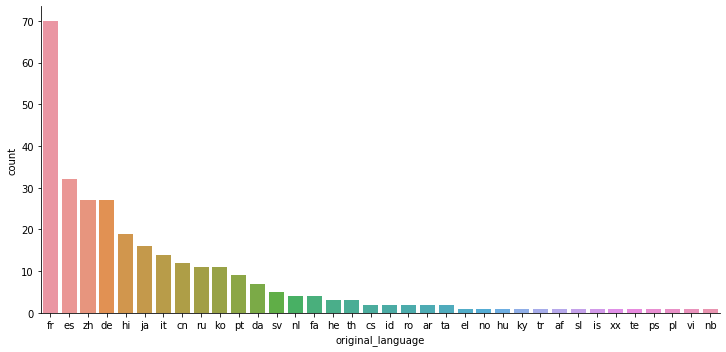

In [34]:
total_por_lingua_de_outros_filmes = tdmb.query("original_language != 'en'").original_language.value_counts()
filmes_lingua_s_ingles = tdmb.query("original_language != 'en'")


sns.catplot(x = "original_language", kind = "count", data = filmes_lingua_s_ingles,
            aspect = 2, order = total_por_lingua_de_outros_filmes.index )

In [36]:
notas_toystory = notas.query("filmesId == 1")
notas_jumanji = notas.query("filmesId == 2")
print("Media Toy Story %.2f" % notas_toystory.nota.mean())
print("Media Jumanji %.2f" % notas_jumanji.nota.mean())

Media Toy Story 3.92
Media Jumanji 3.43


In [37]:
import numpy as np

filme1 = np.append(np.array([2.5]*10), np.array([3.5]*10))
filme2 = np.append(np.array([5]*10), np.array([1]*10))
print(filme1.mean(), filme2.mean())

3.0 3.0


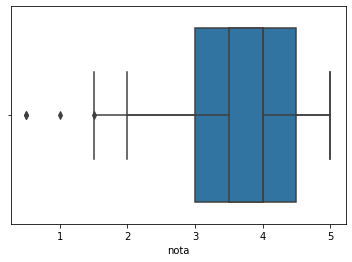

In [39]:
sns.boxplot(notas_toystory.nota)
sns.boxplot(notas_jumanji.nota)

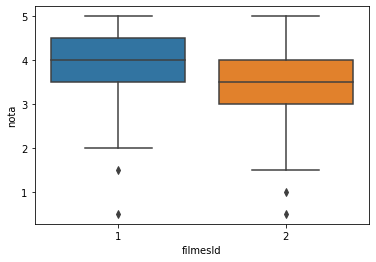

In [40]:
sns.boxplot(x = "filmesId", y = "nota", data = notas.query("filmesId in [1,2]"))